In [ ]:
# import libraries
import pandas as pd

In [ ]:
# load titanic dataset
raw_data = pd.read_csv('titanic_full.csv')

In [ ]:
raw_data.head()

# examine the dataframe

In [ ]:
# shape
len(raw_data)

In [ ]:
raw_data.columns

In [ ]:
raw_data.Survived.value_counts()

In [ ]:
raw_data[['Name', 'Age']].head()

In [ ]:
raw_data.isna().sum()

In [ ]:
clean_data = raw_data.drop('Cabin', axis=1)

In [ ]:
clean_data.head()

In [ ]:
clean_data.columns

## fill missing values

In [ ]:
clean_data.Age.mean()

In [ ]:
median_age = clean_data.Age.median()

In [ ]:
clean_data.Age.mode()

In [ ]:
clean_data['Age'] = clean_data['Age'].fillna(median_age)

In [ ]:
clean_data.isna().sum()

In [ ]:
clean_data.Embarked.value_counts()

In [ ]:
clean_data['Embarked'] = clean_data['Embarked'].fillna('U')

In [ ]:
#clean_data.to_csv('clean_data_titanic.csv', index=False)

## preprocessing our dataset for model building

In [ ]:
preprocessed_data = pd.read_csv('clean_data_titanic.csv')

In [ ]:
preprocessed_data.head()

In [ ]:
gender_columns = pd.get_dummies(preprocessed_data['Sex'], prefix='sex')

In [ ]:
gender_columns.head()

In [ ]:
embarked_columns = pd.get_dummies(preprocessed_data['Embarked'], prefix='embarked')

In [ ]:
embarked_columns.head()

In [ ]:
preprocessed_data = pd.concat([preprocessed_data, gender_columns], axis=1)
preprocessed_data.head()

In [ ]:
preprocessed_data = pd.concat([preprocessed_data, embarked_columns], axis=1)

In [ ]:
preprocessed_data.head()

In [ ]:
first_class = preprocessed_data[preprocessed_data.Pclass == 1]

In [ ]:
sum(first_class['Survived']) / len(first_class) * 100

In [ ]:
second_class = preprocessed_data[preprocessed_data.Pclass == 2]

In [ ]:
sum(second_class['Survived']) / len(second_class) * 100

In [ ]:
third_class = preprocessed_data[preprocessed_data.Pclass == 3]

In [ ]:
sum(second_class['Survived']) / len(third_class) * 100

In [ ]:
preprocessed_data.Ticket.value_counts()

In [ ]:
preprocessed_data = preprocessed_data.drop(['Name', 'Sex', 'Embarked', 'Ticket'], axis=1)

In [ ]:
preprocessed_data.head()

In [ ]:
preprocessed_data = preprocessed_data.drop('PassengerId', axis=1)

In [ ]:
preprocessed_data.columns

## Model building

In [ ]:
features = preprocessed_data.drop('Survived', axis=1)
label = preprocessed_data['Survived']

In [ ]:
features.columns

In [ ]:
label

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.4, random_state=42)

In [ ]:
features_train.shape

In [ ]:
label_train.shape

In [ ]:
features_validation, features_val_test, label_validation, label_val_test = train_test_split(features_test, label_test, test_size=0.5, random_state=42 )

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()

nb_model.fit(features_train, label_train)

In [ ]:
label_predicted = nb_model.predict(features_test)

In [63]:
score = nb_model.score(features_val_test, label_val_test)
score

0.8212290502793296

## model evaluation

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
predicted = nb_model.predict(features_val_test)

In [66]:
predicted.shape

(179,)

In [67]:
label_val_test.shape

(179,)

In [69]:
matrix = confusion_matrix(label_val_test, predicted)
matrix

array([[87, 16],
       [16, 60]], dtype=int64)

Text(0.5, 15.0, 'Preicted class')

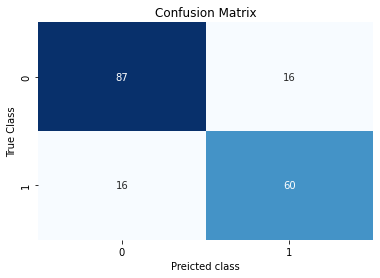

In [70]:
sns.heatmap(matrix, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel("True Class")
plt.xlabel("Preicted class")


In [73]:
accuracy = accuracy_score(label_val_test, predicted)
accuracy * 100

82.12290502793296

In [77]:
classification_report(label_val_test, predicted)

'              precision    recall  f1-score   support\n\n           0       0.84      0.84      0.84       103\n           1       0.79      0.79      0.79        76\n\n    accuracy                           0.82       179\n   macro avg       0.82      0.82      0.82       179\nweighted avg       0.82      0.82      0.82       179\n'

In [78]:
from sklearn.svm import SVC

In [88]:
svm_model = SVC()
svm_model.fit(features_train, label_train)

SVC()

In [89]:
svm_model.score(features_val_test, label_val_test)

0.6703910614525139

In [82]:
pred = svm_model.predict(features_val_test)

In [83]:
svm_matrix = confusion_matrix(label_val_test, pred)
svm_matrix

array([[100,   3],
       [ 56,  20]], dtype=int64)

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
svm_parameter = {
    'kernel' : ['linear', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma' : [0.01, 0.1, 1, 10, 100]
}

In [92]:
svm = SVC()

In [93]:
svm_gs = GridSearchCV(estimator=svm, param_grid=svm_parameter, cv=5)

In [94]:
svm_gs.fit(features_train, label_train)

In [ ]:
svm_best = svm_gs.best_estimator_

In [ ]:
svm_best.score(features_val_test, label_val_test)